In [102]:
%matplotlib notebook

In [111]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pandas import DataFrame
import json
from datetime import datetime

In [112]:

variants_df = pd.read_csv('covid-variants.csv')
variants_df.rename(columns={'location':'country'},inplace=True)

variants_df.head()

,country,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,7/6/2020,Alpha,0,0.0,3
1,Angola,7/6/2020,B.1.1.277,0,0.0,3
2,Angola,7/6/2020,B.1.1.302,0,0.0,3
3,Angola,7/6/2020,B.1.1.519,0,0.0,3
4,Angola,7/6/2020,B.1.160,0,0.0,3


In [113]:

countries_6_variants_df = variants_df.loc[variants_df['country'].isin(['United States','Canada','Germany','India','Japan','Sweden'])]

countries_6_variants_df.head()

,country,date,variant,num_sequences,perc_sequences,num_sequences_total
13344,Canada,5/11/2020,Alpha,0,0.0,903
13345,Canada,5/11/2020,B.1.1.277,0,0.0,903
13346,Canada,5/11/2020,B.1.1.302,0,0.0,903
13347,Canada,5/11/2020,B.1.1.519,0,0.0,903
13348,Canada,5/11/2020,B.1.160,0,0.0,903


In [114]:
countries_6_variants_df['date'] = pd.to_datetime(countries_6_variants_df.date)

#df['DOB1'] = df['DOB'].dt.strftime('%m/%d/%Y')
#countries_6_variants_df['date'] = pd.to_datetime(countries_6_variants_df['date'],format ='%Y%m%d')
#countries_6_variants_df['date'] = countries_6_variants_df['date'].dt.strftime('%m/%d/%Y')

countries_6_variants_df.head()

C:\Users\radgu\AppData\Local\Temp\ipykernel_18040\3410378526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_6_variants_df['date'] = pd.to_datetime(countries_6_variants_df.date)


,country,date,variant,num_sequences,perc_sequences,num_sequences_total
13344,Canada,2020-05-11,Alpha,0,0.0,903
13345,Canada,2020-05-11,B.1.1.277,0,0.0,903
13346,Canada,2020-05-11,B.1.1.302,0,0.0,903
13347,Canada,2020-05-11,B.1.1.519,0,0.0,903
13348,Canada,2020-05-11,B.1.160,0,0.0,903


In [119]:
# Create a group based on the values in the 'maker' column
data_group = countries_6_variants_df.groupby('country')

# Count how many times each maker appears in our group
count_country = data_group['country'].count()

count_country


country
Canada           1056
Germany          1056
India            1056
Japan            1056
Sweden           1056
United States    1080
Name: country, dtype: int64

<IPython.core.display.Javascript object>


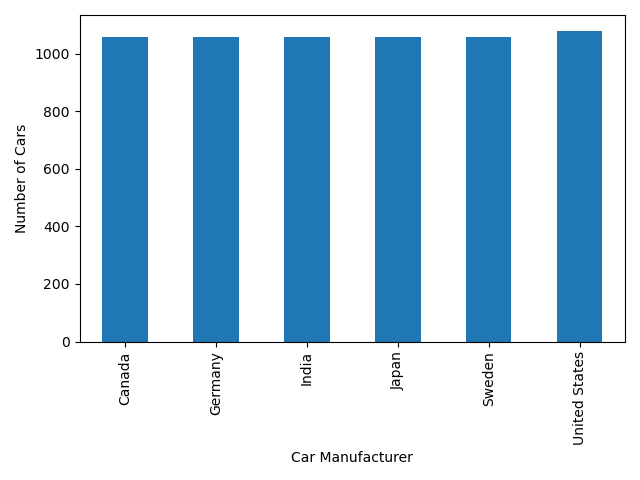

In [120]:
# Create a bar chart based off of the group series from before
count_chart = count_country.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Car Manufacturer")
count_chart.set_ylabel("Number of Cars")


plt.show()
plt.tight_layout()

In [79]:
# Framinf the date range
A = '2020-01-01'
B = '2021-12-31'
data_truncated = countries_6_face_covering_df.loc[(combined_dataset['face_covering_date'] >= A) & (combined_dataset['face_covering_date'] <= B)]
data_truncated.head(5)
data_truncated.count()

countries_6_face_covering_df.count()

country               4562
Code                  4562
face_covering_date    4562
facial_coverings      4562
dtype: int64

In [92]:
canada_df = data_truncated.loc[data_truncated['country'].isin(['Canada'])]
canada_df_grouped = canada_df.groupby(['face_covering_date','facial_coverings'])
x_axis = canada_df[['facial_coverings']]
dates = canada_df[['face_covering_date']]
#canada_df_grouped.count()
#x_axis
dates
#plt.subplots(figsize=(120, 20))
plt.plot(dates,x_axis,linewidth=2, markersize=10,marker="p",color="orange")

TypeError: unhashable type: 'numpy.ndarray'

<IPython.core.display.Javascript object>


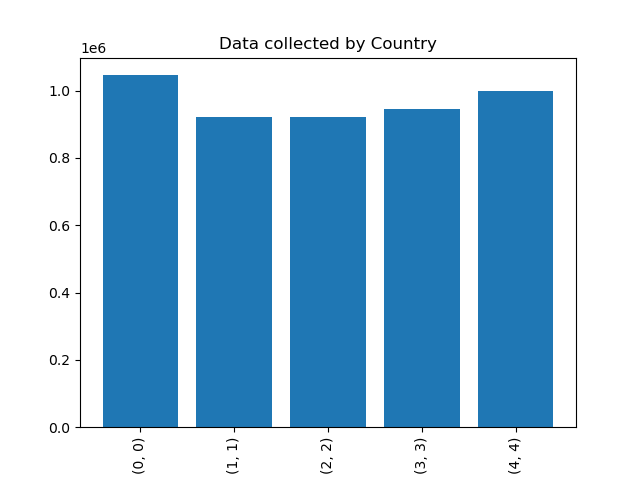

In [72]:
combined_dataset_grouped = combined_dataset.groupby("facial_coverings")


country_count = combined_dataset_grouped['facial_coverings'].value_counts()
x_axis = np.arange(len(country_count ))
plt.bar(x_axis,country_count)

plt.xticks(x_axis,country_count.index.values)
plt.xticks(rotation=90)

plt.title('Data collected by Country')
#plt.xlabel('Drug Regimen')
#plt.ylabel('Number of timepoints')
#x_axis
#drug_regimen_count.index.values
#plt.xticks(x_axis,drug_regimen_count.index.values)
#rotate x-axis labels.
#plt.xticks(rotation=90)

plt.show()
